#Encontro 08

**Preparo Prévio:**
1.	Leitura prévia necessária: Magalhães e Lima (7ª. Edição): Definições 3.4 e 3.5  (pág. 82 a 84), Exemplo 3.10 (pág. 86), Definição 4.1 (pág. 106), Definição 4.2 (pág. 110), Exemplo 4.9 (pág. 118) e Definição 4.6 (pág. 121).

**Hoje:**
1.	Descrever modelos discretos quanto aos resultados teóricos.
2.	Explicar a utilização de modelos probabilísticos no contexto da literatura estatística.
3.	Contrastar resultados teóricos e empíricos.
4.	Fechamento do conteúdo.

**Próxima aula:**
1.	Leitura prévia necessária: Magalhães e Lima (7ª. Edição): Seção 5.1 (pág. 137) e Seção 5.2 (pág. 146).

___
Nessa aula, teremos contato com algumas distribuições discretas e como essas podem ser utilizadas para modelagem de dados reais.

> **Confira alguns itens obrigatórios verificados durante a vistoria do Detran**

> *Todos os veículos, novos ou velhos, precisam passar por uma vistoria todos os anos. (...) O motorista precisa estar atento a alguns itens obrigatórios. Tudo deve funcionar perfeitamente, apresentar bom estado de conservação e estar dentro do prazo de validade.*

> <sup>Fonte: http://extra.globo.com/noticias/brasil/transito-seguro/confira-alguns-itens-obrigatorios-verificados-durante-vistoria-do-detran-10190355.html</sup>

Essa matéria lista 14 itens que são inspecionados pelo Detran, dentre os quais têm-se: extintor de incêndio deve estar dentro do prazo de validade; pneus devem estar em bom estado de conservação; buzina deve funcionar perfeitamente; e cintos de segurança para todos os ocupantes do carro. Se, no final das contas, todos os 14 itens estiverem funcionando perfeitamente, o motorista irá feliz para casa assegurado que seu carro está seguro e sem problemas com a vistoria.

____
1) A base de dados `Carros.txt` apresenta, para cada um dos três mil carros de passeio vistoriados, duas informações: tipo de carro (1: Popular e 2: Não Popular) e quantidade de itens vistoriados em não conformidade (que pode variar de 0 a 14). 

In [2]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/mirwox/Dropbox/Insper/2015/Courses/DataScience/github/data_science/aula8


In [3]:
Carros = pd.read_table('Carros.txt', sep=' ')

1.1. Considerando todos os carros, analise a quantidade de itens vistoriados em não conformidade. Pela tabela de frequências relativas, calcule a média e variância dessa quantidade (veja as tabelas 4.1 e 4.2 no Magalhães). Interprete-os.

In [5]:
#Escreva sua resposta em Python aqui

1.2. Assuma que a variável *Quantidade de itens em não conformidade* possa ser ajustada pelo modelo Binomial com parâmetros *n*=14 e *p*=0,10. Interprete esses parâmetros para o problema em questão.

> Insira sua resposta aqui

1.3. Uma variável definida pela contagem de sucessos em *n* tentativas possui DISTRIBUIÇÃO BINOMIAL se tiver as seguintes propriedades:
* é uma contagem de *n* repetições (ou tentativas ou ensaios) idênticas;
* cada repetição tem apenas 2 resultados possíveis: um é denominado sucesso e o outro, fracasso;
* a probabilidade de sucesso para cada ensaio é denominada *p* e será constante em cada repetição. Então, a probabilidade de fracasso *(1-p)* também não varia de tentativa para tentativa;
* As tentativas são independentes.

A variável *Quantidade de itens em não conformidade* segue as propriedades citadas acima? Discuta sua resposta.


> Insira sua resposta aqui


**Independente do sua resposta anterior, considere a distribuição binomial para modelar a variável em questão nos próximos itens!**

1.4. Utilizando o método `stats.binom.pmf`, obtenha a probabilidade de cada uma das quantidades de itens em não conformidade, ou seja, varie $x$ entre $0$ e $14$. Calcule o valor esperado (média) e a variância da quantidade de itens em não conformidade.

 Há algum resultado pronto em função dos parâmetros da distribuição que retornam valor esperado e variância? (veja a Tabela 4.4 do livro)

> Insira sua resposta aqui

1.5. Compare as probabilidades teóricas com as frequências relativas observadas nos dados. **Na prática, qual a necessidade de um modelo probabilístico já que se têm os dados observados?**

> Insira sua resposta aqui

1.6. Execute os comandos abaixo e compare com os seus resultados acima obtidos.

In [6]:
# resultados empíricos

Ti = Carros.Tipo
Q = Carros.Quantidade

fr = Q.value_counts(True).sort_index()
print('Frequência relativa:')
print(fr)

a = len(fr)

xbarra = 0
for i in range(a):
  xbarra = xbarra + i * fr[i]

print('média amostral:')
print(xbarra)

Frequência relativa:
0    0.288000
1    0.316667
2    0.221333
3    0.108333
4    0.046333
5    0.015667
6    0.002667
7    0.000667
8    0.000333
dtype: float64
média amostral:
1.37133333333


In [7]:
varobs = 0
for i in range(a):
  varobs = varobs + (i - xbarra)**2 * fr[i]
print('Variância amostral:')
print(varobs)

Variância amostral:
1.57944488889


In [8]:
# resultados teóricos

p = 0.1
pr = []
for i in range(15):
  pr.append(stats.binom.pmf(i, 14, p))

print('Função de probabilidade - P(X=x):')
print(pr)

mu = 0
for i in range(15):
  mu = mu + i * pr[i]
print('Valor esperado:')
print(mu)

Função de probabilidade - P(X=x):
[0.22876792454960998, 0.35586121596606141, 0.2570108781977114, 0.11422705697676022, 0.034902711854010011, 0.0077561581897800267, 0.0012926930316300015, 0.00016415149608000069, 1.5959173230000058e-05, 1.1821609800000021e-06, 6.5675610000000304e-08, 2.6535600000000108e-09, 7.3710000000000372e-11, 1.2600000000000108e-12, 1.0000000000000058e-14]
Valor esperado:
1.4


In [9]:
sigma2 = 0
for i in range(15):
  sigma2 = sigma2 + (i - mu)**2 * pr[i]
print('Variância teórica:')
print(sigma2)

Variância teórica:
1.26


1.7. Graficamente, tem-se as duas opções abaixo para comparar se os resultados empíricos se encaixam com o modelo teórico proposto. 
- A primeira delas contrasta a frequência relativa e a probabilidade teórica para uma determinada quantidade de itens em não conformidade! Por exemplo, para $x=1$, os dados apresentam $31,7\%$ dos carros com exatamente um item em não conformidade, enquanto, pelo modelo teórico, era esperado aproximadamente $35,6\%$.
- O segundo gráfico contrasta a frequência relativa acumulada com a probabilidade acumulada até determinada quantidade de itens em não conformidade. Por exemplo, para $x\leq 1$, os dados apresentam $60,5\%$ dos carros com até um item em não conformidade, enquanto, pelo modelo teórico, era esperado aproximadamente $58,5\%$.

Observe os gráficos e refine sua conclusão quanto ao uso do modelo teórico para ajustar a variável em questão!

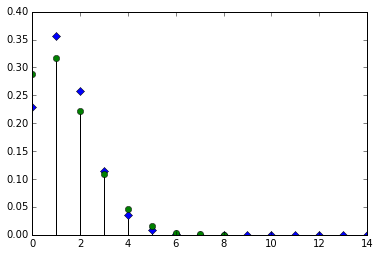

In [10]:
# resultados empíricos e resultados teóricos 
# comparando graficamente pela função de probabilidade 
plt.plot(range(len(pr)), pr, 'D')
plt.vlines(range(len(fr)), 0, fr)
plt.plot(range(len(fr)), fr, 'o')

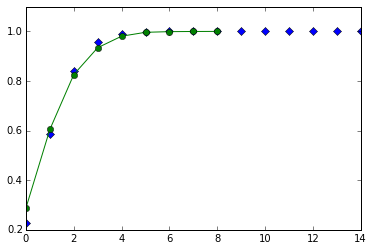

In [11]:
# resultados empíricos e resultados teóricos 
# comparando graficamente pela função de distribuição acumulada

fra = fr.cumsum()

p = 0.1
fda = []
for i in range(15):
  fda.append(stats.binom.cdf(i, 14, p))

plt.plot(range(len(fda)), fda, 'D')
plt.plot(range(len(fra)), fra, 'o-')

1.8. Considerando apenas os carros populares, o modelo Binomial com parâmetros *n*=14 e *p*=0,10 é adequado para ajustar a variável Quantidade de itens em não conformidade? Se sim, justifique; caso não, sugira novos valores para os parâmetros da distribuição ajuste aos dados.

___
2) Há outros modelos probabilísticos discretos. 

Cite pelo menos dois destes modelos e para quais problemas práticos poderiam ser aplicados.

> 